- Nama Lengkap : Adisaputra Zidha Noorizki
- Username : hi_zidha
- Email : hi.zidha@gmail.com

### Import Dataset

Menggunakan dataset **Diabetes Prediction** oleh Mohammed Mustafa yang dapat diakses melalui [link ini](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset).

In [3]:
!pip install -q kaggle

Upload file **kaggle.json** untuk mentautkan dengan akun Kaggle

In [ ]:
from google.colab import files
files.upload()

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download 'iammustafatz/diabetes-prediction-dataset'

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 80.8MB/s]


In [7]:
!unzip -o diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


### Data Understanding

Menyimpan dataset sebagai DataFrame di sebuah variabel

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Menampilkan data rangkuman statistik deskriptif dari file **spotify_songs.csv**

In [10]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Menampilkan data bernilai NaN setiap kolom pada dataset

In [11]:
miss_values = df.isna().sum()
print("Jumlah nilai NaN dalam setiap kolom:")
print(miss_values)

Jumlah nilai NaN dalam setiap kolom:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Menampilkan ada berapa banyak data unik dari setiap kolom pada dataset

In [12]:
unique_data = df.nunique()
print("Jumlah nilai unik:")
print(unique_data)

Jumlah nilai unik:
gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64


Terlihat data pada fitur **gender** terdapat 3 macam, perlunya ditampilkan terlebih dahulu

In [13]:
unique_gender = df['gender'].unique()
print("Nilai unik dalam kolom 'Gender':", unique_gender)

Nilai unik dalam kolom 'Gender': ['Female' 'Male' 'Other']


Dikarenakan ada tiga jenis data pada fitur 'gender' dan namun pada penelitian ini berfokus pada 2 gender saja yaitu 'Female' dan 'Male' saja

In [14]:
df = df[df['gender'] != 'Other']

In [15]:
# Melihat berapa jumlah data setiap nilai dalam kolom "diabetes"
diabetes_counts = df['diabetes'].value_counts()

# Menampilkan jumlah data setiap nilai dalam kolom "diabetes"
print(diabetes_counts)

0    91482
1     8500
Name: diabetes, dtype: int64


Menampilkan ukuran dataset

In [16]:
df.shape

(99982, 9)

Cek apakah ada data outliner untuk beberapa kolom yang memiliki kemungkinan, dengan indikator jumlah data unique, yaitu ***age*** , ***bmi*** , ***HbA1c_level*** , ***blood_glucose_level***

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

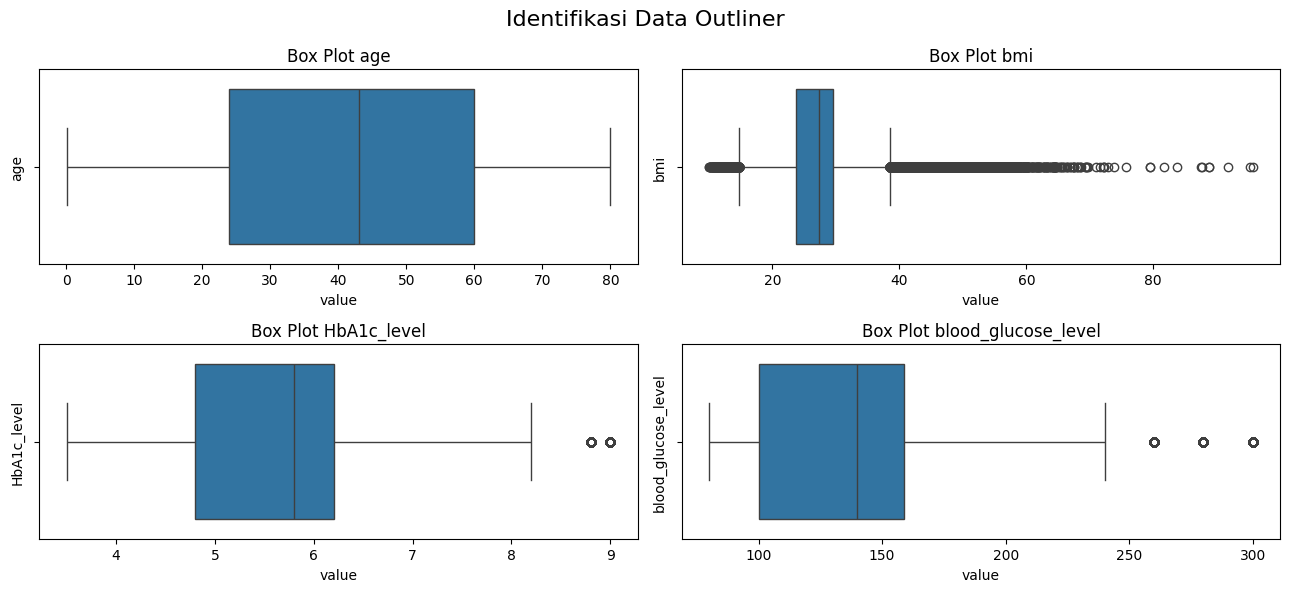

In [18]:
column = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 6))
fig.suptitle("Identifikasi Data Outliner", fontsize=16)

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=df[column[i]], ax=ax)
    ax.set_title("Box Plot {}".format(column[i]))
    ax.set_xlabel("value")
    ax.set_ylabel(column[i])

plt.tight_layout()
plt.show()

Dari grafik di atas, dapat disimpulkan bahwa ada **data outliner** di beberapa fitur atau kolom pada dataset, maka dari itu diperlukan proses untuk menghapus outliner

In [19]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)

# Rentang Interkuartil (IQR)
IQR = Q3 - Q1

# Menghapus outlier berdasarkan IQR
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah melakukan drop outliers
df_cleaned.shape

<ipython-input-19-090a5c136c0b>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


(79008, 9)

In [20]:
unique_data_1 = df_cleaned.nunique()
print("Jumlah nilai unik:")
print(unique_data_1)

Jumlah nilai unik:
gender                    2
age                     102
hypertension              1
heart_disease             1
smoking_history           6
bmi                    2380
HbA1c_level              12
blood_glucose_level      13
diabetes                  1
dtype: int64


Dikarenakan setelah proses drop outliers terdapat varian data pada beberapa fitur yang hilang. Maka dapat disimpukan bahwa untuk kasus pada dataset ini, data outliers berisi informasi penting atau representasi dari kejadian langka yang memang valid. Dan analisis dan tahap selanjutnya akan menggunakan data sebelum proses drop outliers dilakukan

#### Univariate Analysis

Mengkategorikan fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [21]:
numerical = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
categorical = ['gender', 'smoking_history']

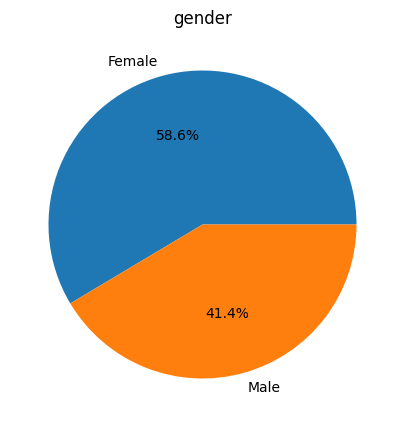

In [ ]:
# Fitur Gender

feature = categorical[0]
count = df[feature].value_counts()

plt.figure(figsize=(5,5))
count.plot(kind='pie', title=feature, autopct='%1.1f%%');
plt.ylabel('')
plt.show()

             jumlah sampel persentase
No Info              35810     35.8 %
never                35092     35.1 %
former                9352      9.4 %
current               9286      9.3 %
not current           6439      6.4 %
ever                  4003      4.0 %


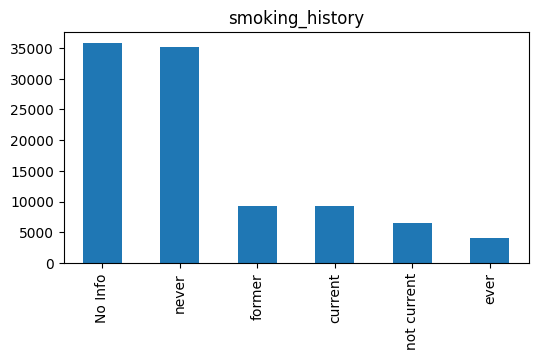

In [ ]:
# Fitur Smoking History

feature = categorical[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_smoking_his = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
df_smoking_his['persentase'] = df_smoking_his['persentase'].astype(str) + ' %'
print(df_smoking_his)

plt.figure(figsize=(6,3))
count.plot(kind='bar', title=feature);
plt.show()

Menampilkan fitur yang memiliki data berupa numerik

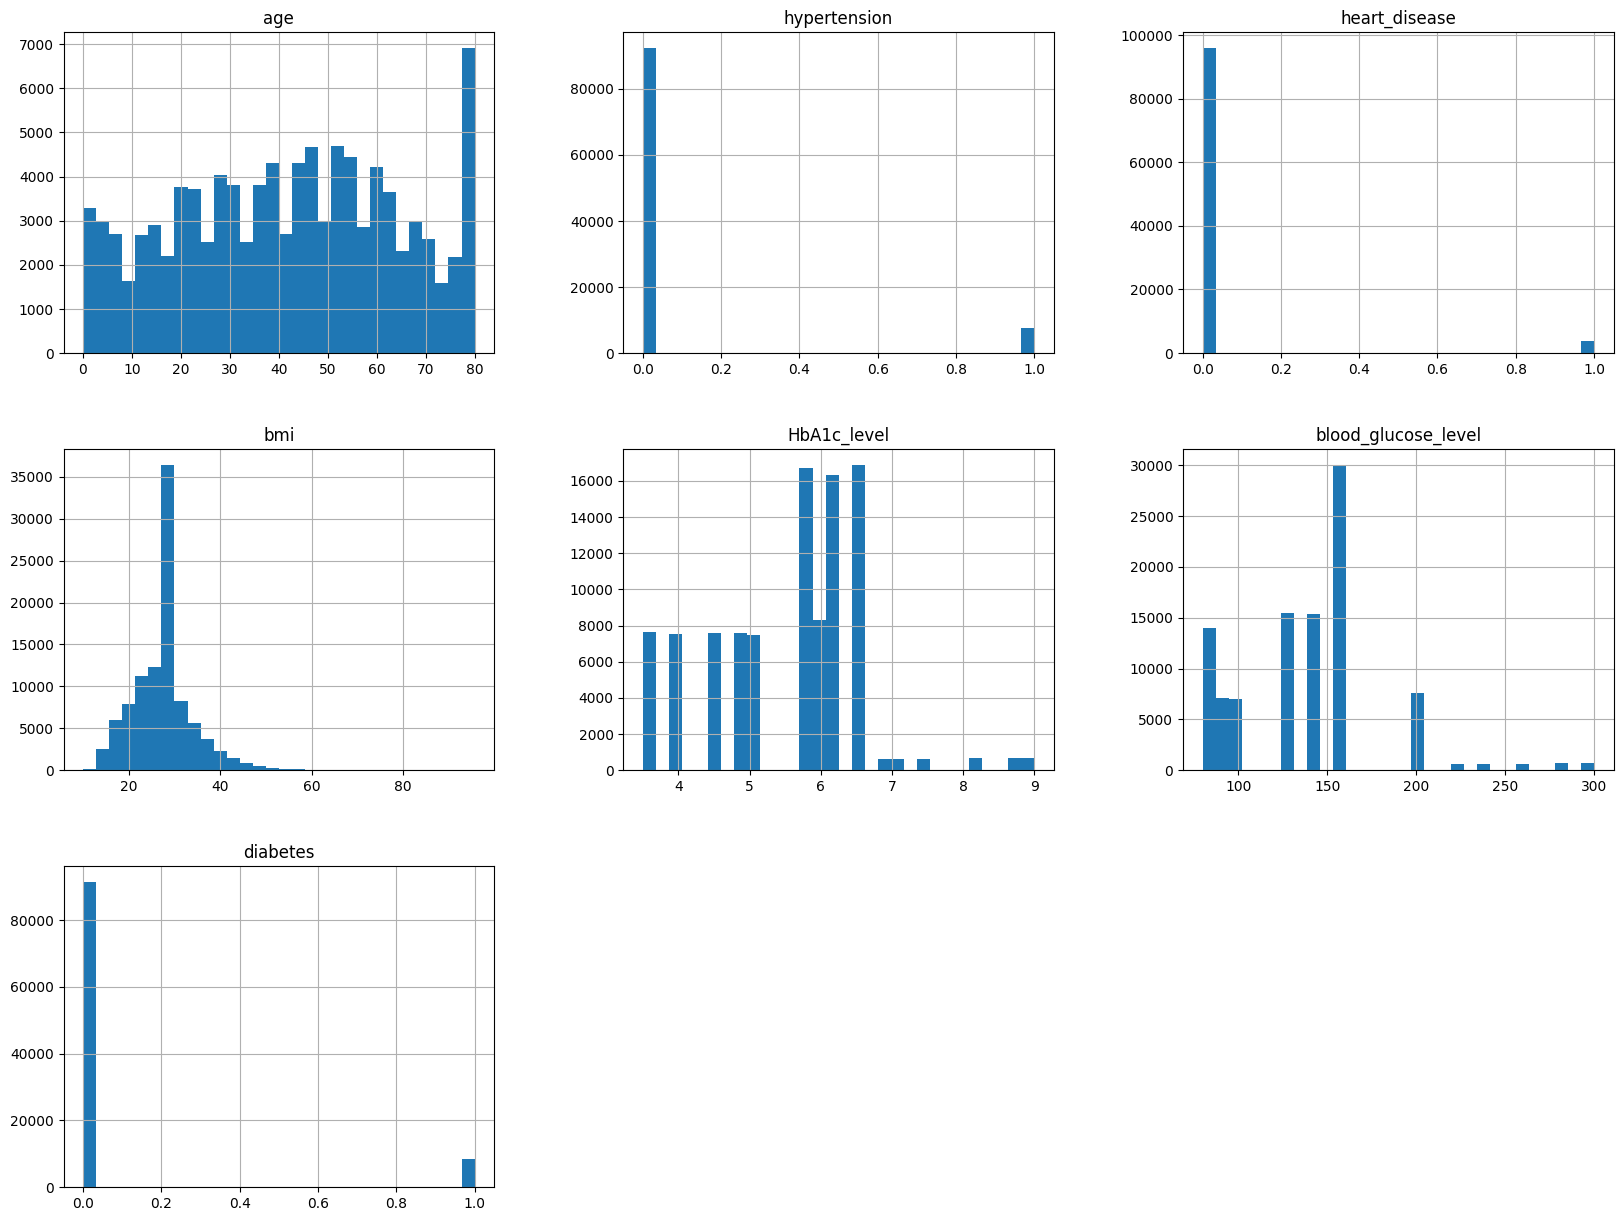

In [ ]:
df.hist(bins=30, figsize=(20,15))
plt.show()

Dapat dilihat bahwa jumlah setiap varian data pada beberapa fitur memiliki gap atau jarak yang begitu besar, maka dari itu akan dilakukan proses undersampling pada **Data Preparation** nantinya

#### Multivariate Analysis

Multivariate Analysis bertujuan untuk mengetahui hubungan antara dua atau lebih variabel pada dataset

<ipython-input-22-d6ff1394b24a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="diabetes", kind="bar", data=df, height=3, aspect=4, palette="Set1")
<ipython-input-22-d6ff1394b24a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="diabetes", kind="bar", data=df, height=3, aspect=4, palette="Set1")


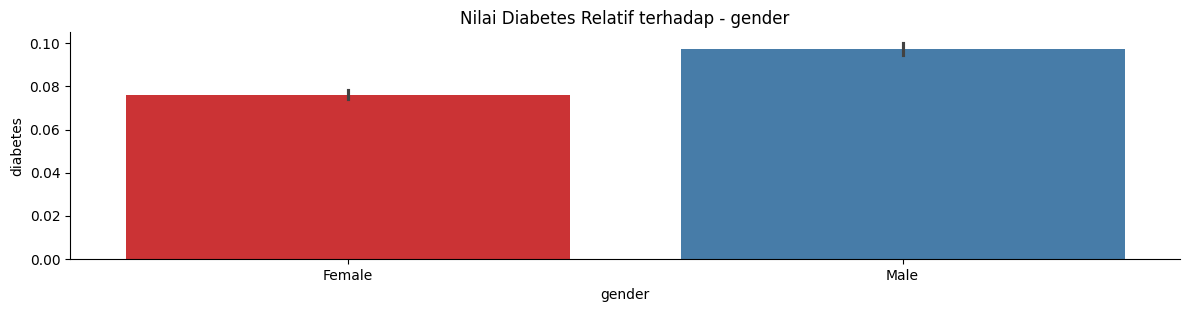

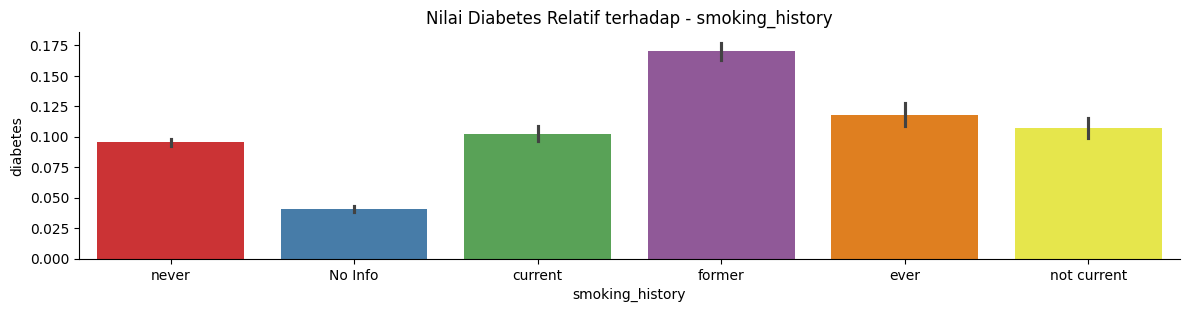

In [22]:
multivariate_features = df.select_dtypes(include='object').columns.to_list()
for col in multivariate_features:
    sns.catplot(x=col, y="diabetes", kind="bar", data=df, height=3, aspect=4, palette="Set1")
    plt.title("Nilai Diabetes Relatif terhadap - {}".format(col))

Menampilkan hubungan atau korelasi antara fitur-fitur yang bertipe data numerik

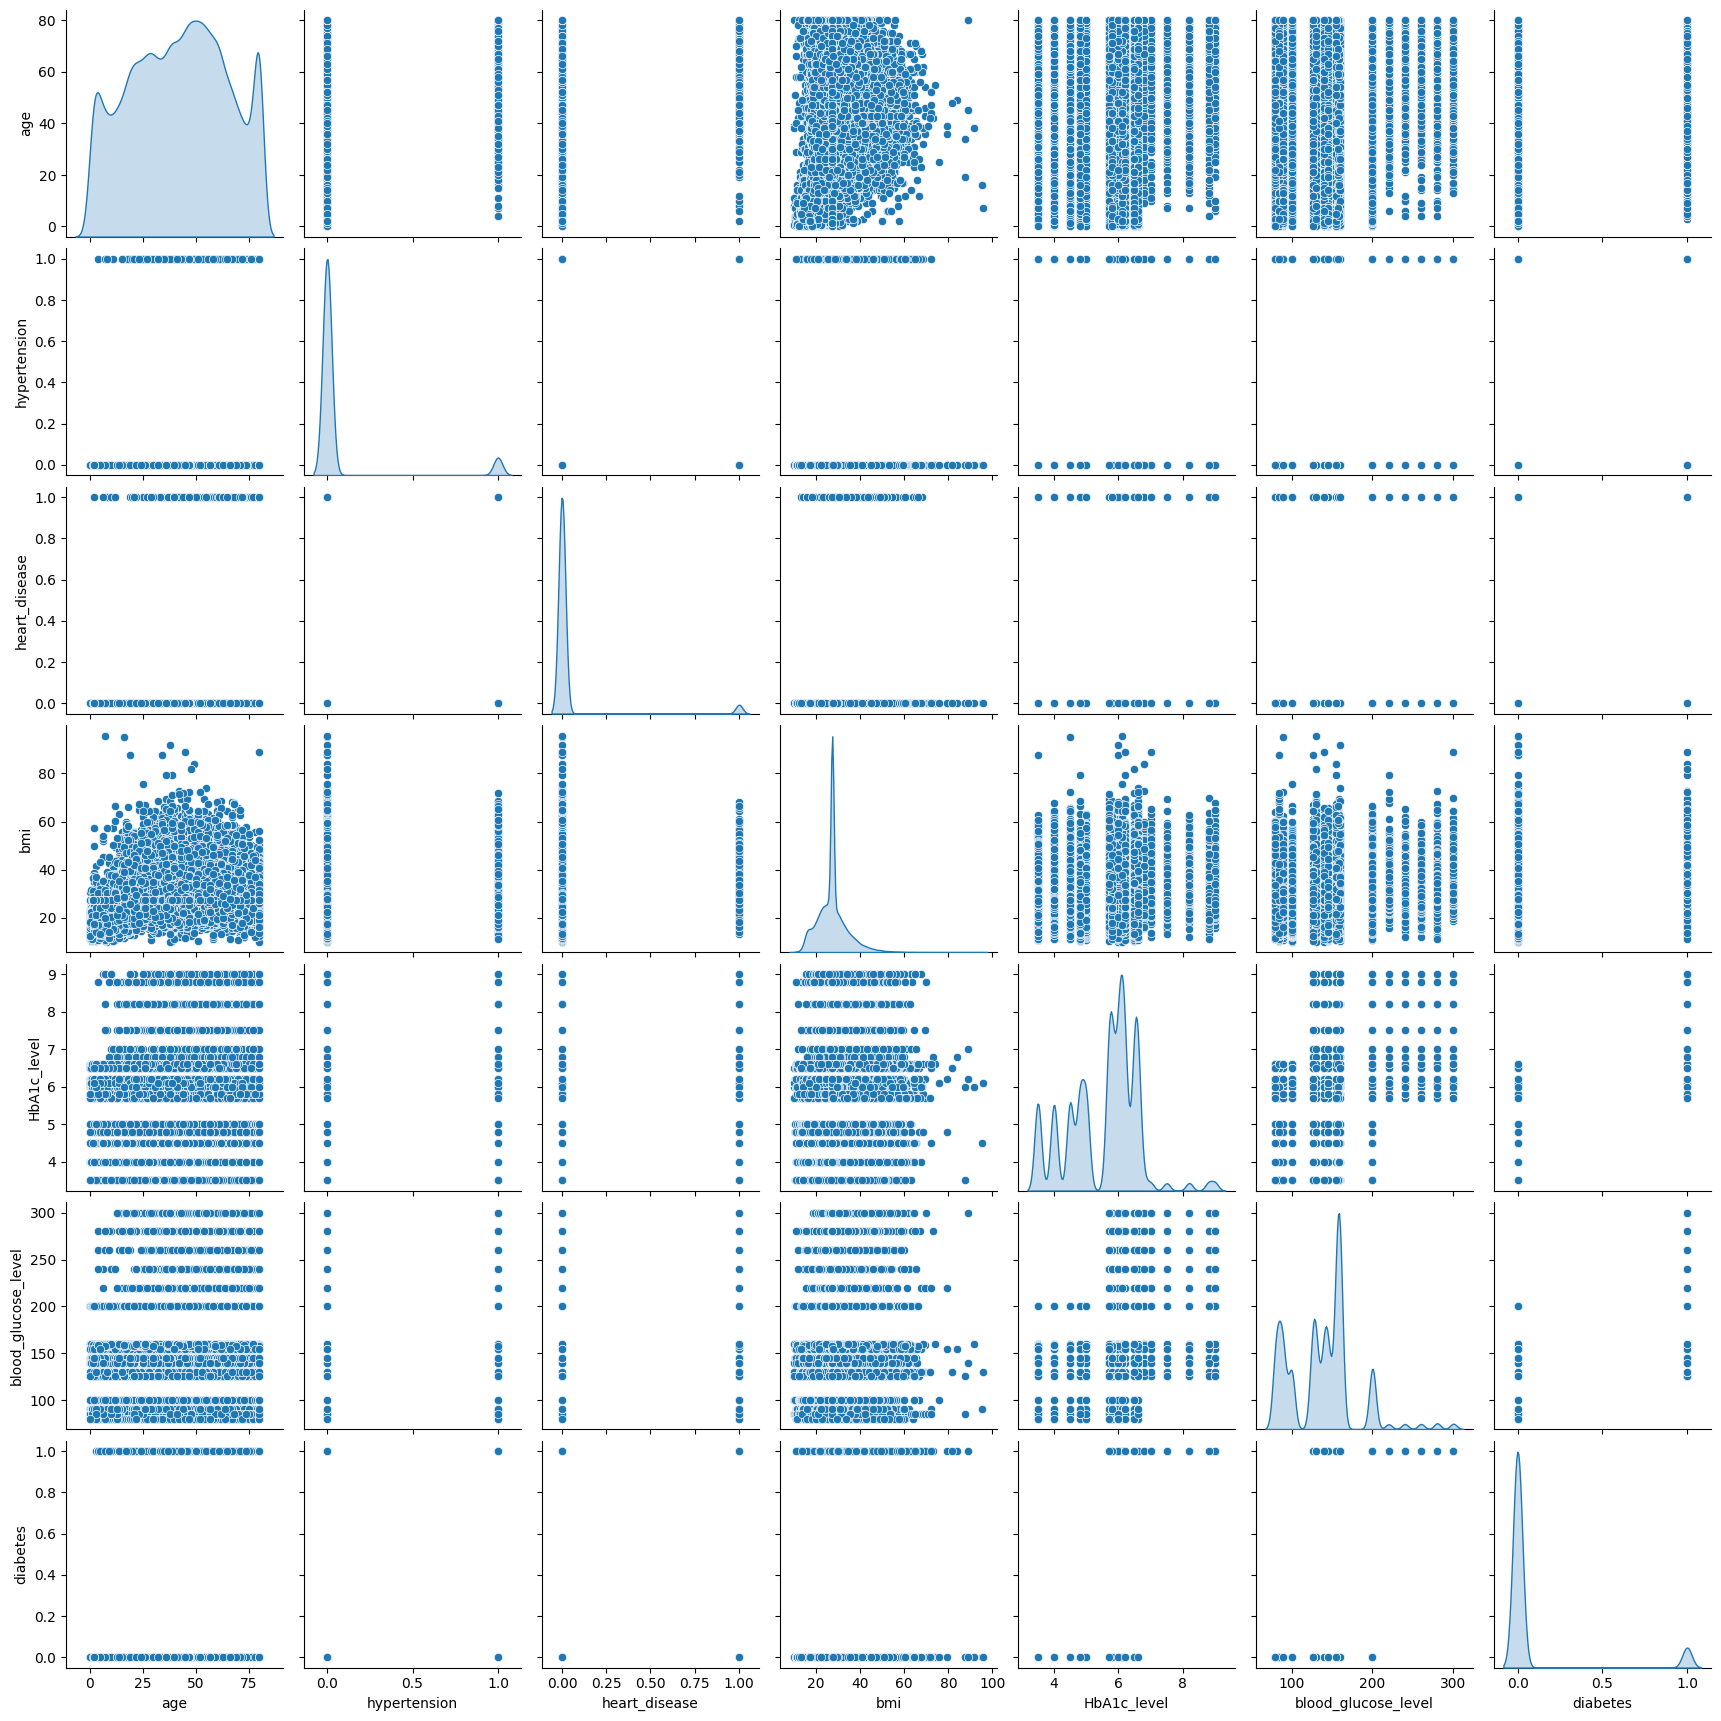

In [23]:
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-27-11d5180bdba1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

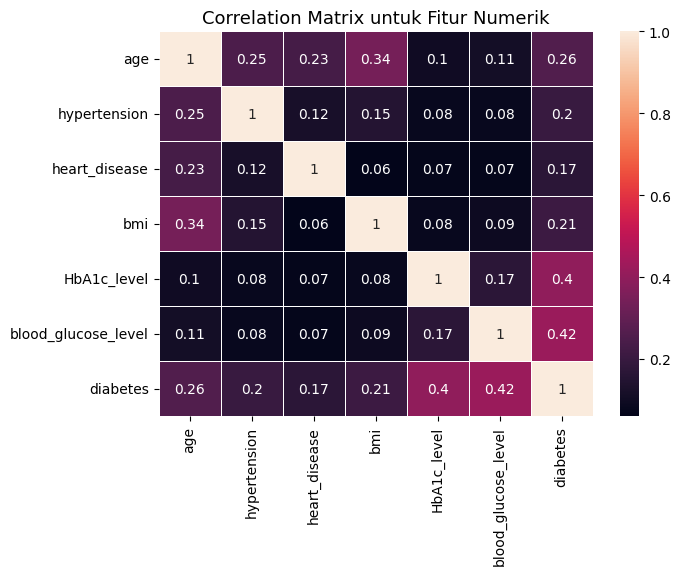

In [27]:
plt.figure(figsize=(7, 5))
correlation_matrix = df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=13)

Apabila diamati, ada beberapa kesimpulan yang dapat diambil dari proses analisis di atas antara lain:
1. Hubungan Antar Fitur
  * Terdapat beberapa hubungan positif yang signifikan antara beberapa pasangan fitur, seperti:
    * Usia (age) memiliki korelasi positif yang cukup kuat dengan indeks massa tubuh (bmi) (0.34).
    * Tingkat HbA1c (HbA1c_level) memiliki korelasi positif yang signifikan dengan tingkat glukosa darah (blood_glucose_level) (0.17).
    * Diabetes memiliki korelasi yang kuat dengan HbA1c_level (0.40) dan tingkat glukosa darah (0.42).
  * Namun, sebagian besar korelasi antara fitur-fitur numerik tidak sangat tinggi, yang menunjukkan bahwa fitur-fitur tersebut tidak saling tergantung secara linear.

2. Korelasi dengan Variabel Target (Diabetes):
  * Korelasi antara variabel target (diabetes) dengan variabel prediktor menunjukkan beberapa hubungan yang signifikan:
    * Tingkat HbA1c memiliki korelasi tertinggi dengan diabetes (0.40), menunjukkan bahwa tingkat HbA1c dapat menjadi indikator yang kuat untuk risiko diabetes.
    * Tingkat glukosa darah juga memiliki korelasi yang cukup tinggi dengan diabetes (0.42), menunjukkan hubungan yang kuat antara tingkat glukosa darah dan diabetes.
    * Usia (0.26) dan indeks massa tubuh (0.21) juga memiliki korelasi yang cukup tinggi dengan diabetes, menunjukkan bahwa kedua fitur ini juga dapat digunakan sebagai prediktor risiko diabetes.

## Data Preparation

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


In [29]:
from sklearn.preprocessing import OneHotEncoder

df = pd.concat([df, pd.get_dummies(df['gender'], prefix='gender')],axis=1)
df = pd.concat([df, pd.get_dummies(df['smoking_history'], prefix='smoking_history')],axis=1)
df.drop(['gender','smoking_history'], axis=1, inplace=True)

pd.set_option('display.max_columns', None)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0


In [30]:
diabetes_column = df.pop('diabetes')
df.insert(len(df.columns), 'diabetes', diabetes_column)

df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,1,0,0
1,54.0,0,0,27.32,6.6,80,1,0,1,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0,0
3,36.0,0,0,23.45,5.0,155,1,0,0,1,0,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0,0


Split dataset menjadi beberapa bagian

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(["diabetes"],axis = 1)
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (79985, 14)
y_train: (79985,)
X_test: (19997, 14)
y_test: (19997,)


Proses standarisasi nilai data pada setiap fitur dataset mengacu pada proses mengubah skala nilai pada setiap fitur.

In [32]:
from sklearn.preprocessing import StandardScaler

numerical1 = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()

In [33]:
scaler.fit(X_train[numerical1])
X_train[numerical1] = scaler.transform(X_train.loc[:, numerical1])

X_train[numerical1].head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
48062,-1.236213,-0.285161,-0.201169,0.001400,-0.679824,1.524037
38243,-1.724515,-0.285161,-0.201169,-1.102026,0.534514,-0.196450
3806,0.406260,-0.285161,-0.201169,0.001400,1.375209,-0.196450
63147,-0.614736,-0.285161,-0.201169,0.001400,0.534514,1.524037
6006,-1.413777,-0.285161,-0.201169,-1.446752,1.001567,-0.933802


In [34]:
X_train[numerical1].describe().round(3)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,79985.000,79985.000,79985.000,79985.000,79985.000,79985.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.854,-0.285,-0.201,-2.604,-1.894,-1.425
25%,-0.792,-0.285,-0.201,-0.559,-0.680,-0.934
50%,0.051,-0.285,-0.201,0.001,0.254,0.049
75%,0.806,-0.285,-0.201,0.339,0.628,0.516
max,1.694,3.507,4.971,10.294,3.243,3.982


Implementasi Metode RUS (*Random Under Sampling*), di mana merupakan teknik yang digunakan untuk menangani ketidakseimbangan kelas dalam dataset.

In [35]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [36]:
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)

Shape X_train: (79985, 14)
Shape y_train: (79985,)


Melihat jumlah data untuk setiap kelas pada y_train

In [37]:
class_counts = y_train.value_counts()
print("Jumlah data untuk setiap kelas pada y_train:")
print(class_counts)

Jumlah data untuk setiap kelas pada y_train:
0    73260
1     6725
Name: diabetes, dtype: int64


Implementasi RUS pada kelas Mayoritas

In [38]:
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print("Shape X_train setelah resampling:", X_train_resampled.shape)
print("Shape y_train setelah resampling:", y_train_resampled.shape)

Shape X_train setelah resampling: (13450, 14)
Shape y_train setelah resampling: (13450,)


Melihat jumlah data untuk setiap kelas pada y_train_resampled

In [39]:
class_counts = y_train_resampled.value_counts()
print("Jumlah data untuk setiap kelas pada y_train_resampled:")
print(class_counts)

Jumlah data untuk setiap kelas pada y_train_resampled:
0    6725
1    6725
Name: diabetes, dtype: int64


## Modeling

Studi kasus ini menggunakan tiga (3) macam algoritma antara lain:
1. Random Forest
2. Naive Bayes Gaussian
3. XGBoost

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Implementasi Algoritma Random Forest

In [42]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    random_state=42
)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_train_rf = rf_model.predict(X_train_resampled)

accuracy_rf = accuracy_score(y_train_resampled, y_pred_train_rf)
precision_rf = precision_score(y_train_resampled, y_pred_train_rf)
recall_rf = recall_score(y_train_resampled, y_pred_train_rf)
f1_score_rf = f1_score(y_train_resampled, y_pred_train_rf)

Implementasi Algoritma Gaussian Naive Bayes

In [43]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_resampled, y_train_resampled)
y_pred_train_gnb = gnb_model.predict(X_train_resampled)

accuracy_gnb = accuracy_score(y_train_resampled, y_pred_train_gnb)
precision_gnb = precision_score(y_train_resampled, y_pred_train_gnb)
recall_gnb = recall_score(y_train_resampled, y_pred_train_gnb)
f1_score_gnb = f1_score(y_train_resampled, y_pred_train_gnb)

Implementasi Algoritma XGBoosting

In [44]:
xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_train_xgb = xgb_model.predict(X_train_resampled)

accuracy_xgb = accuracy_score(y_train_resampled, y_pred_train_xgb)
precision_xgb = precision_score(y_train_resampled, y_pred_train_xgb)
recall_xgb = recall_score(y_train_resampled, y_pred_train_xgb)
f1_score_xgb = f1_score(y_train_resampled, y_pred_train_xgb)

## Evaluasi Models

In [49]:
df_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

metrics_rf = {'Model': 'Random Forest',
              'Accuracy': accuracy_rf,
              'Precision': precision_rf,
              'Recall': recall_rf,
              'F1-Score': f1_score_rf}

metrics_gnb = {'Model': 'Gaussian Naive Bayes',
               'Accuracy': accuracy_gnb,
               'Precision': precision_gnb,
               'Recall': recall_gnb,
               'F1-Score': f1_score_gnb}

metrics_xgb = {'Model': 'XGBoost',
               'Accuracy': accuracy_xgb,
               'Precision': precision_xgb,
               'Recall': recall_xgb,
               'F1-Score': f1_score_xgb}

df_rf = pd.DataFrame(metrics_rf, index=[0])
df_gnb = pd.DataFrame(metrics_gnb, index=[0])
df_xgb = pd.DataFrame(metrics_xgb, index=[0])

df_metrics = pd.concat([df_rf, df_gnb, df_xgb], ignore_index=True)

df_metrics.head()

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.954870,0.949588,0.960743,0.955133
1,Gaussian Naive Bayes,0.831599,0.853072,0.801190,0.826317
2,XGBoost,0.995539,0.996277,0.994796,0.995536


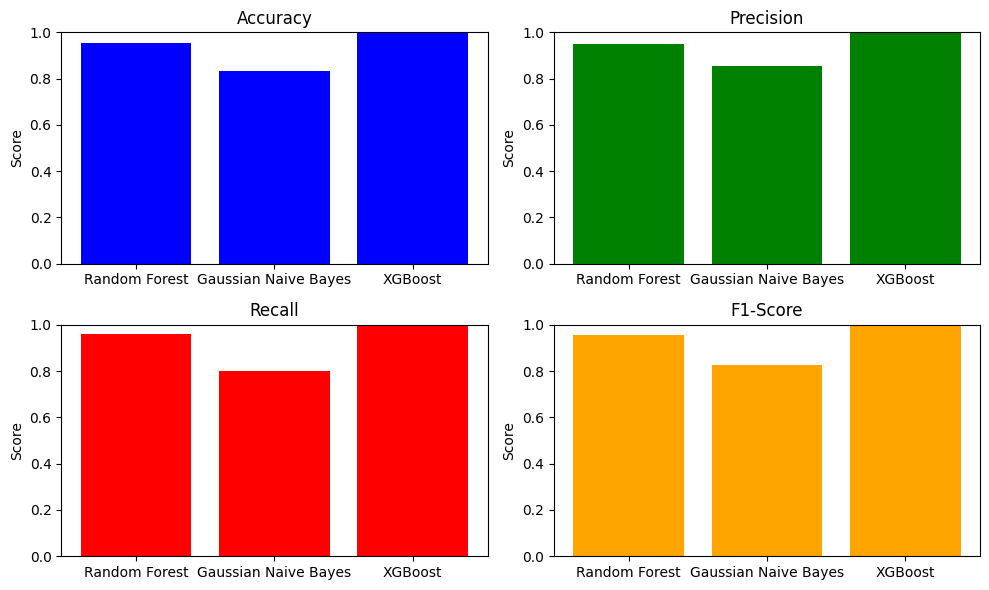

In [50]:
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(df_metrics['Model'], df_metrics['Accuracy'], color='blue')
plt.title('Accuracy')
plt.ylim(0, 1)
plt.ylabel('Score')

# Precision
plt.subplot(2, 2, 2)
plt.bar(df_metrics['Model'], df_metrics['Precision'], color='green')
plt.title('Precision')
plt.ylim(0, 1)
plt.ylabel('Score')

# Recall
plt.subplot(2, 2, 3)
plt.bar(df_metrics['Model'], df_metrics['Recall'], color='red')
plt.title('Recall')
plt.ylim(0, 1)
plt.ylabel('Score')

# F1-Score
plt.subplot(2, 2, 4)
plt.bar(df_metrics['Model'], df_metrics['F1-Score'], color='orange')
plt.title('F1-Score')
plt.ylim(0, 1)
plt.ylabel('Score')

plt.tight_layout()
plt.show()